### Old Car Price Prediction

Introduction About the Data : The dataset The goal is to predict price of given old car (Regression Analysis).

There are 7 independent variables
- `name` :- Name of car or model of car
- `year` :- car purchase year how old it is.
- `km_driven` :- How many Km the car was running.
- `fuel` :- car fuel type eg petrol or diesel
- `seller_type` :- different types of sellers that can be involved in a transaction
- `transmission` :- In the context of automobiles, "transmission" generally refers to the mechanism that transfers power from the engine to the wheels, enabling the car to move
- `owner` :- The car owner can be an individual, such as a private individual who purchased the car for personal use.

Target variable

- `selling_price` :- Price of the given old car

Dataset Source Link :- https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

- No Missing Value here

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df=df.drop(labels=['name'],axis=1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
df.duplicated().sum()

842

In [8]:
df[df.duplicated()]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4310,2015,465000,41123,Diesel,Dealer,Manual,First Owner
4311,2017,1900000,20118,Petrol,Dealer,Automatic,First Owner
4319,2012,400000,70000,Diesel,Individual,Manual,First Owner
4322,2013,500000,120000,Diesel,Individual,Manual,First Owner


- we have a 763 Duplicated Record so let's drop this duplicated records 

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
# segregate numerical and categorical columns
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print("Numerical Columns :- ",numerical_columns)
print("Categorical Columns :- ",categorical_columns)

Numerical Columns :-  Index(['year', 'selling_price', 'km_driven'], dtype='object')
Categorical Columns :-  Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [12]:
df[categorical_columns].describe()

,fuel,seller_type,transmission,owner
count,3498,3498,3498,3498
unique,5,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,1762,2753,3187,2157


In [14]:
categorical_columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [15]:
df['fuel'].value_counts()

fuel
Diesel      1762
Petrol      1676
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

In [16]:
df['seller_type'].value_counts()

seller_type
Individual          2753
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64

In [17]:
df['transmission'].value_counts()

transmission
Manual       3187
Automatic     311
Name: count, dtype: int64

In [18]:
df['owner'].value_counts()

owner
First Owner             2157
Second Owner             964
Third Owner              285
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

In [19]:
numerical_columns

Index(['year', 'selling_price', 'km_driven'], dtype='object')

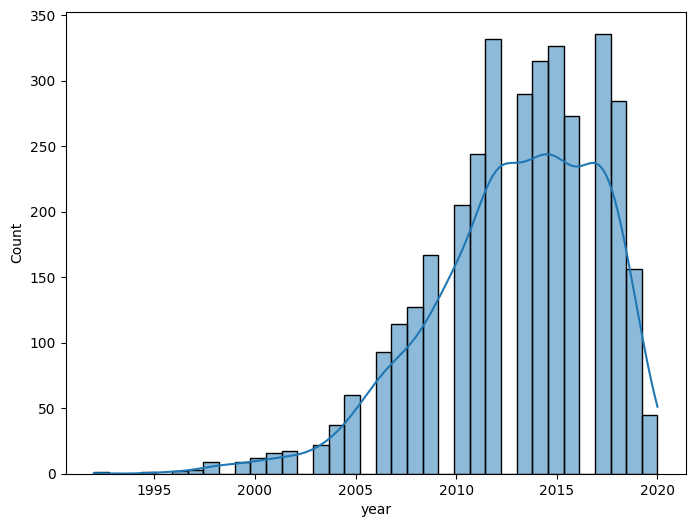

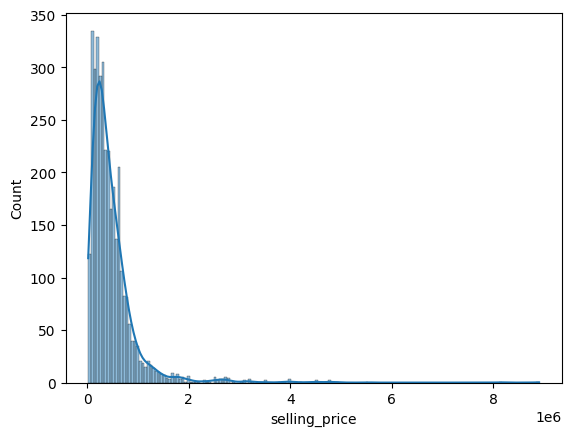

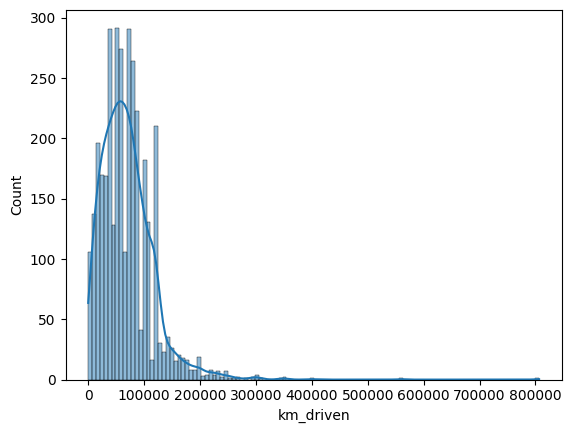

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

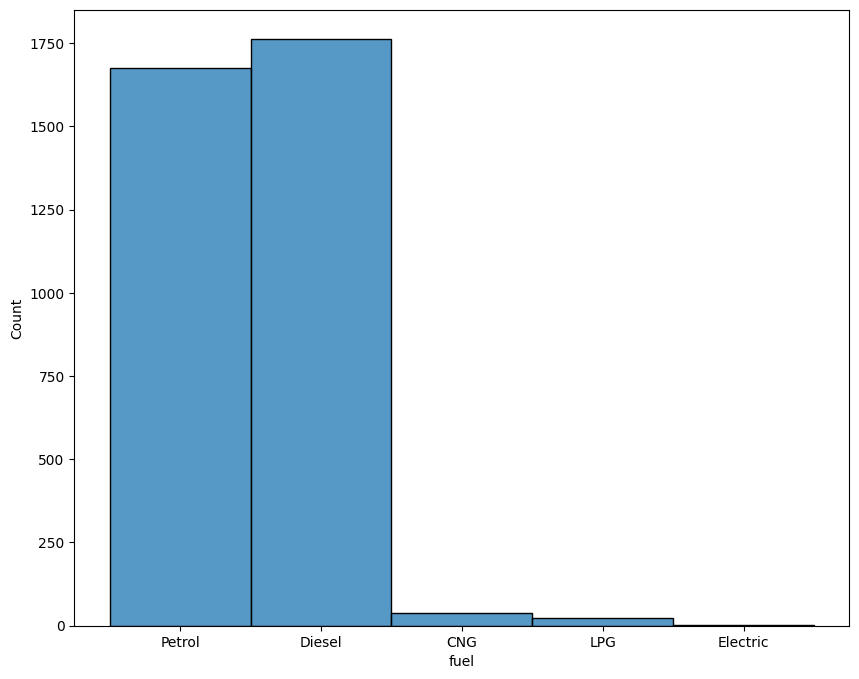

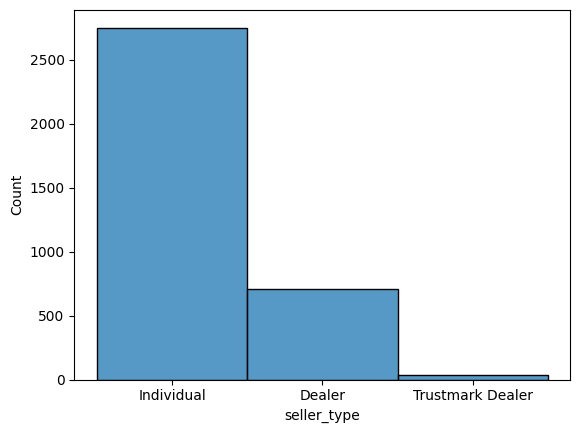

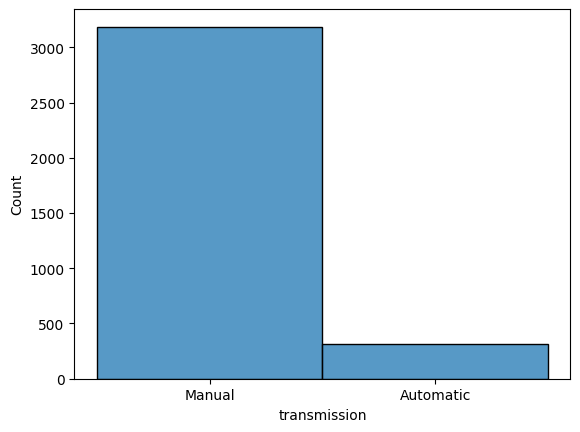

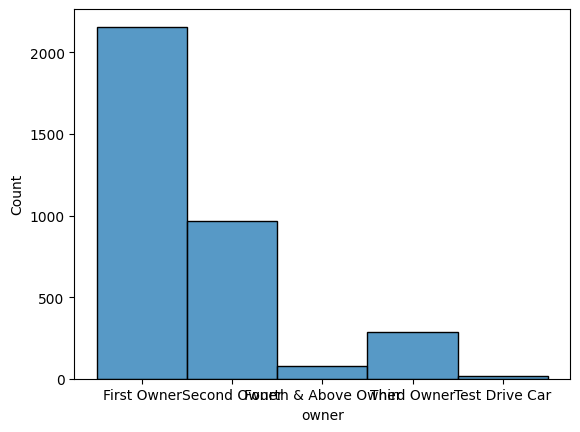

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i)
    print('\n')
    plt.show()

In [22]:
categorical_columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [23]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [24]:
fuel_map = {"Petrol":4,"Diesel":5,"CNG":3,"LPG":2,"Electric":1}

In [25]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [26]:
seller_type_map = {"Individual":3,"Dealer":2,"Trustmark Dealer":1}

In [27]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
transmission_map = {"Manual":1,"Automatic":2}

In [29]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [30]:
owner_map = {"First Owner":1,"Second Owner":2,"Fourth & Above Owner":4,"Third Owner":3,"Test Drive Car":5}

In [31]:
categorical_columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

### Convert Categorical value into Numerical value

In [32]:
df['fuel'] = df['fuel'].map(fuel_map)
df['seller_type'] = df['seller_type'].map(seller_type_map)
df['transmission'] = df['transmission'].map(transmission_map)
df['owner'] = df['owner'].map(owner_map)

In [33]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,3,1,1
1,2007,135000,50000,4,3,1,1
2,2012,600000,100000,5,3,1,1
3,2017,250000,46000,4,3,1,1
4,2014,450000,141000,5,3,1,2


### Now Our Complete EDA Done Let's see the dataset

In [35]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,3,1,1
1,2007,135000,50000,4,3,1,1
2,2012,600000,100000,5,3,1,1
3,2017,250000,46000,4,3,1,1
4,2014,450000,141000,5,3,1,2
